# EDAのノートブック

In [2]:
import sys
import os
from pathlib import Path

sys.path.append(os.path.join(Path().resolve(), '..'))

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tqdm import tqdm
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

from utils.utils import make_datapath_list

### 画像ファイル取得

In [3]:
datapath = "../data/"
train_files = make_datapath_list(os.path.join(datapath, "train"))
test_files = make_datapath_list(os.path.join(datapath, "test"))

../data/train/**/*.tif
../data/test/**/*.tif


### 試しに訓練の1枚目のshapeと画像を表示

(1024, 1024, 3)


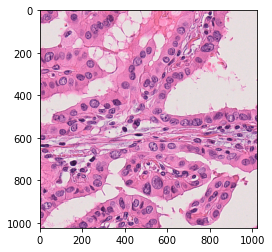

In [4]:
img = Image.open(train_files[0])
img = np.array(img)
print(img.shape)
plt.imshow(img)

### ファイル名から画像に変換する関数

In [5]:
def file2img(files, gray=False):
    if gray:
        imgs = np.empty([0, 224, 224])
    else:
        imgs = np.empty([0, 224, 224, 3])
    for file in tqdm(files, total=len(files)):
        img = Image.open(file)
        img = img.resize((224,224))
        if gray:
            img = img.convert('L')
            img = np.array(img)[np.newaxis, :, :]
        else:
            img = np.array(img)[np.newaxis, :, :, :]
        imgs = np.vstack([imgs, img])
    return imgs

### 訓練、テスト、tissue画像を取得

In [6]:
train_imgs = file2img(train_files)
print(train_imgs.shape)

 45%|████▌     | 2501/5556 [11:09<13:38,  3.73it/s]


KeyboardInterrupt: 

In [ ]:
test_imgs = file2img(test_files)
print(test_imgs.shape)

In [ ]:
tissue_files = make_datapath_list("../data/tissue array/")
tissue_imgs = file2img(tissue_files)
print(tissue_imgs.shape)

### それぞれのrgbの平均値を取得

In [ ]:
train_mean = train_imgs.mean(axis=(0, 1, 2))
test_mean = test_imgs.mean(axis=(0, 1, 2))
tissue_mean = tissue_imgs.mean(axis=(0, 1, 2))

print("train_mean(r,g,b):", train_mean)
print("test_mean(r,g,b):", test_mean)
print("tissue_mean(r,g,b):", tissue_mean)

### それぞれのrgbの標準偏差を取得

In [ ]:
train_std = train_imgs.std(axis=(0, 1, 2))
test_std = test_imgs.std(axis=(0, 1, 2))
tissue_std = tissue_imgs.std(axis=(0, 1, 2))

print("train_std(r,g,b):", train_std)
print("test_std(r,g,b):", test_std)
print("tissue_std(r,g,b):", tissue_std)

utils.pyのImageTransform用に0~1に正規化後の平均と標準偏差を計算

In [ ]:
normalizer = MinMaxScaler()
train_imgs_normalize = normalizer.fit_transform(train_imgs.reshape(-1, 3))
test_imgs_normalize = normalizer.fit_transform(test_imgs.reshape(-1, 3))
tissue_imgs_normalize = normalizer.fit_transform(tissue_imgs.reshape(-1, 3))

train_normalize_mean = train_imgs_normalize.mean(axis=0)
test_normalize_mean = test_imgs_normalize.mean(axis=0)
tissue_normalize_mean = tissue_imgs_normalize.mean(axis=0)

print("train_normalize_mean(r,g,b):", train_normalize_mean)
print("test_normalize_mean(r,g,b):", test_normalize_mean)
print("tissue_normalize_mean(r,g,b):", tissue_normalize_mean)

train_normalize_std = train_imgs_normalize.std(axis=0)
test_normalize_std = test_imgs_normalize.std(axis=0)
tissue_normalize_std = tissue_imgs_normalize.std(axis=0)

print("train_normalize_std(r,g,b):", train_normalize_std)
print("test_normalize_std(r,g,b):", test_normalize_std)
print("tissue_normalize_std(r,g,b):", tissue_normalize_std)

In [ ]:
train_imgs = file2img(train_files, gray=True)
print(train_imgs.shape)

In [ ]:
test_imgs = file2img(test_files, gray=True)
print(test_imgs.shape)

In [ ]:
tissue_files = make_datapath_list("../data/tissue array/")
tissue_imgs = file2img(tissue_files, gray=True)
print(tissue_imgs.shape)

### それぞれの平均値を取得

In [ ]:
train_mean = train_imgs.mean()
test_mean = test_imgs.mean()
tissue_mean = tissue_imgs.mean()

print("train_mean(gray):", train_mean)
print("test_mean(gray):", test_mean)
print("tissue_mean(gray):", tissue_mean)

### それぞれの標準偏差を取得

In [ ]:
train_std = train_imgs.std()
test_std = test_imgs.std()
tissue_std = tissue_imgs.std()

print("train_std(gray):", train_std)
print("test_std(gray):", test_std)
print("tissue_std(gray):", tissue_std)

utils.pyのImageTransform用に0~1に正規化後の平均と標準偏差を計算

In [ ]:
normalizer = MinMaxScaler()
train_imgs_normalize = normalizer.fit_transform(train_imgs.reshape(-1, 1))
test_imgs_normalize = normalizer.fit_transform(test_imgs.reshape(-1, 1))
tissue_imgs_normalize = normalizer.fit_transform(tissue_imgs.reshape(-1, 1))

train_normalize_mean = train_imgs_normalize.mean()
test_normalize_mean = test_imgs_normalize.mean()
tissue_normalize_mean = tissue_imgs_normalize.mean()

print("train_normalize_mean(gray):", train_normalize_mean)
print("test_normalize_mean(gray):", test_normalize_mean)
print("tissue_normalize_mean(gray):", tissue_normalize_mean)

train_normalize_std = train_imgs_normalize.std()
test_normalize_std = test_imgs_normalize.std()
tissue_normalize_std = tissue_imgs_normalize.std()

print("train_normalize_std(gray):", train_normalize_std)
print("test_normalize_std(gray):", test_normalize_std)
print("tissue_normalize_std(gray):", tissue_normalize_std)

グレースケール画像をImageNetで標準化するためにmean, stdの平均を取る

In [ ]:
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

print(np.mean(mean))
print(np.mean(std))

### 試しに訓練の1枚目のグレースケール画像を表示
### 背景領域と組織領域を分離したい

In [ ]:
train_exp = Image.open(train_files[0])
train_exp_gray = train_exp.convert("L")  # グレースケール変換
plt.imshow(train_exp_gray, cmap="gray")